In [22]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

In [23]:
# Download the dataset
from utils import fetch_and_cache
data_url = 'http://www.ds100.org/fa19/assets/datasets/hw4-realdonaldtrump_tweets.json.zip'
file_name = 'hw4-realdonaldtrump_tweets.json.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Tue Mar 10 13:27:39 2020
MD5 hash of file: 664c6f85e94ea09e1507eedd7626adc5
Located at data/hw4-realdonaldtrump_tweets.json.zip


In [24]:
# trump = pd.read_csv('realdonaldtrumptweets.csv', usecols=range(0, 42))
# Unzip the dataset
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open('hw4-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

In [25]:
trump = pd.DataFrame({
    'time': pd.to_datetime([tweet['created_at'] for tweet in all_tweets]),
    'source': [tweet['source'] for tweet in all_tweets],
    'text': [tweet['text'] if "text" in tweet else tweet['full_text'] for tweet in all_tweets],
    'retweet_count': [tweet["retweet_count"] for tweet in all_tweets],
}, index=[tweet['id'] for tweet in all_tweets],
   columns=['time', 'source', 'text', 'retweet_count'],
).sort_index()
trump.head(20)

,time,source,text,retweet_count
690171032150237184,2016-01-21 13:56:11+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059
690171403388104704,2016-01-21 13:57:39+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339
690173226341691392,2016-01-21 14:04:54+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006
690176882055114758,2016-01-21 14:19:26+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266
690180284189310976,2016-01-21 14:32:57+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886
690271688127213568,2016-01-21 20:36:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",New Day on CNN treats me very badly. @AlisynCamerota is a disaster. Not going to watch anymore.,1429
690272687168458754,2016-01-21 20:40:07+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Happy birthday to my friend, the great @jacknicklaus - a totally special guy!",1053
690313350278819840,2016-01-21 23:21:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Thank you, Iowa! #Trump2016 https://t.co/ryhEheTLqN",2329
690315202261155840,2016-01-21 23:29:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Thank you! #Trump2016 https://t.co/pcdmyIO1Zt,1463
690315366564626433,2016-01-21 23:29:43+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Thank you, New Hampshire!\n#Trump2016 https://t.co/TG9oZKly4l",1761


In [60]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

Text(0.5, 1.0, 'Distribution of Tweets from iPhone Over Years')

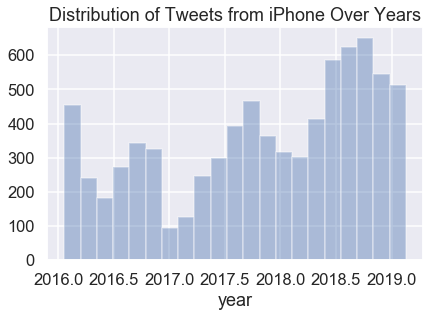

In [75]:
top_devices = trump['source'].value_counts().head(2).index
iphone = trump[trump['source'] == top_devices[0]]['year']
android = trump[trump['source'] == top_devices[1]]['year']
sns.distplot(iphone, kde=False)
plt.title('Distribution of Tweets from iPhone Over Years')


Text(0.5, 1.0, 'Distribution of Tweets from Android Over Years')

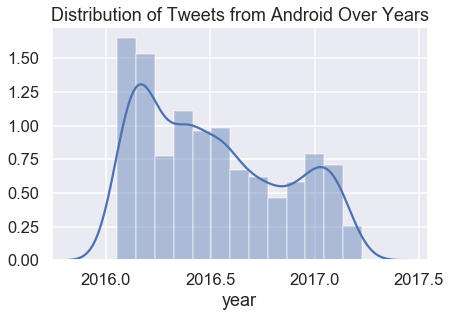

In [73]:
sns.distplot(android)
plt.title('Distribution of Tweets from Android Over Years')

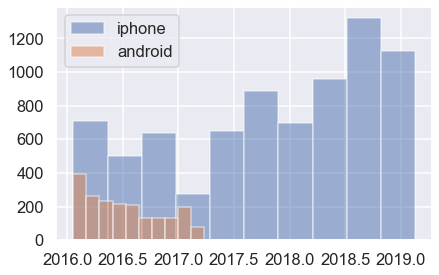

In [59]:
plt.hist(iphone, alpha=0.5, label='iphone')
plt.hist(android, alpha=0.5, label='android')
plt.legend()

Text(0.5, 1.0, 'Distributions of Tweet Sources Over Years')

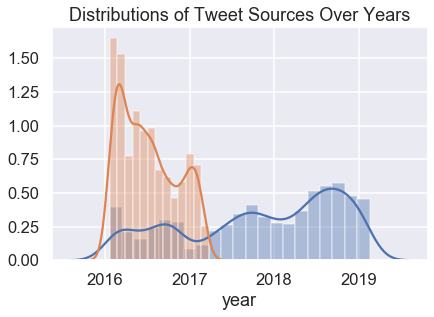

In [72]:
for device in top_devices:
    sns.distplot(trump[trump['source'] == device]['year'])
plt.title('Distributions of Tweet Sources Over Years')

Text(0.5, 1.0, 'Distributions of Tweet Sources Over Years')

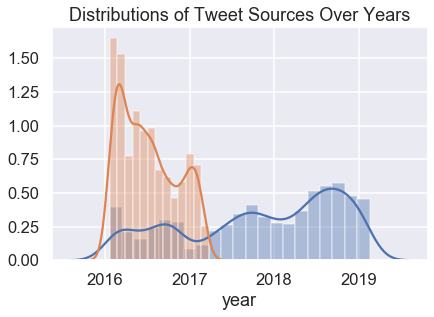

In [71]:
top_devices = trump['source'].value_counts().head(2).index
for device in top_devices:
    sns.distplot(trump[trump['source'] == device]['year'])
plt.title('Distributions of Tweet Sources Over Years')
